## PHASE 2: DATA PREPROCESSING

### This is the Car Evaluation Dataset from UCI Machine Learning Repository

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay


##### Fetch the dataset from the UCI Machine Learning Repository   
Ensure that you have ucimlrepo installed. If not, install it using the following command:   
```!pip install ucimlrepo```   
Then, fetch the dataset as follows below

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

##### Creating the dataframe

In [3]:
df = pd.DataFrame(X, columns=car_evaluation.data.feature_names)
df_y = pd.DataFrame(y, columns=car_evaluation.data.target_names)
car_df = pd.concat([df, df_y], axis=1)
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


##### Descriptive Statistics

In [6]:
car_df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


Check the data types of the columns

In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Check for missing values and outliers

In [8]:
car_df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [51]:
feature_names = list(car_df.columns.values)
for feature in feature_names:
    unique_count =car_df[feature].nunique()
    unique_vals = car_df[feature].unique()
    print("{}: {} values, {}".format(feature, unique_count, unique_vals))

buying: 4 values, ['vhigh' 'high' 'med' 'low']
maint: 4 values, ['vhigh' 'high' 'med' 'low']
doors: 4 values, ['2' '3' '4' '5more']
persons: 3 values, ['2' '4' 'more']
lug_boot: 3 values, ['small' 'med' 'big']
safety: 3 values, ['low' 'med' 'high']
class: 4 values, ['unacc' 'acc' 'vgood' 'good']


Some graphs to visualize the data

Barplots

In [ ]:
car_df['buying'].value_counts().plot(kind='bar')

In [ ]:
car_df['maint'].value_counts().plot(kind='bar')

Pie Plots

In [ ]:
labels = car_df['doors'].unique()
values = car_df['doors'].value_counts() 
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%')

In [ ]:
labels = car_df['persons'].unique()
values = car_df['persons'].value_counts() 
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%')

### Start of One Hot Encoding

#### One Hot Encoding

In [8]:
enc = OneHotEncoder()
enc_data = enc.fit_transform(car_df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']])
enc_df = pd.DataFrame(enc_data.toarray(), columns=enc.get_feature_names_out(car_df.columns[:-1]))
enc_df.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


##### Correlation Matrix on encoded dataframe

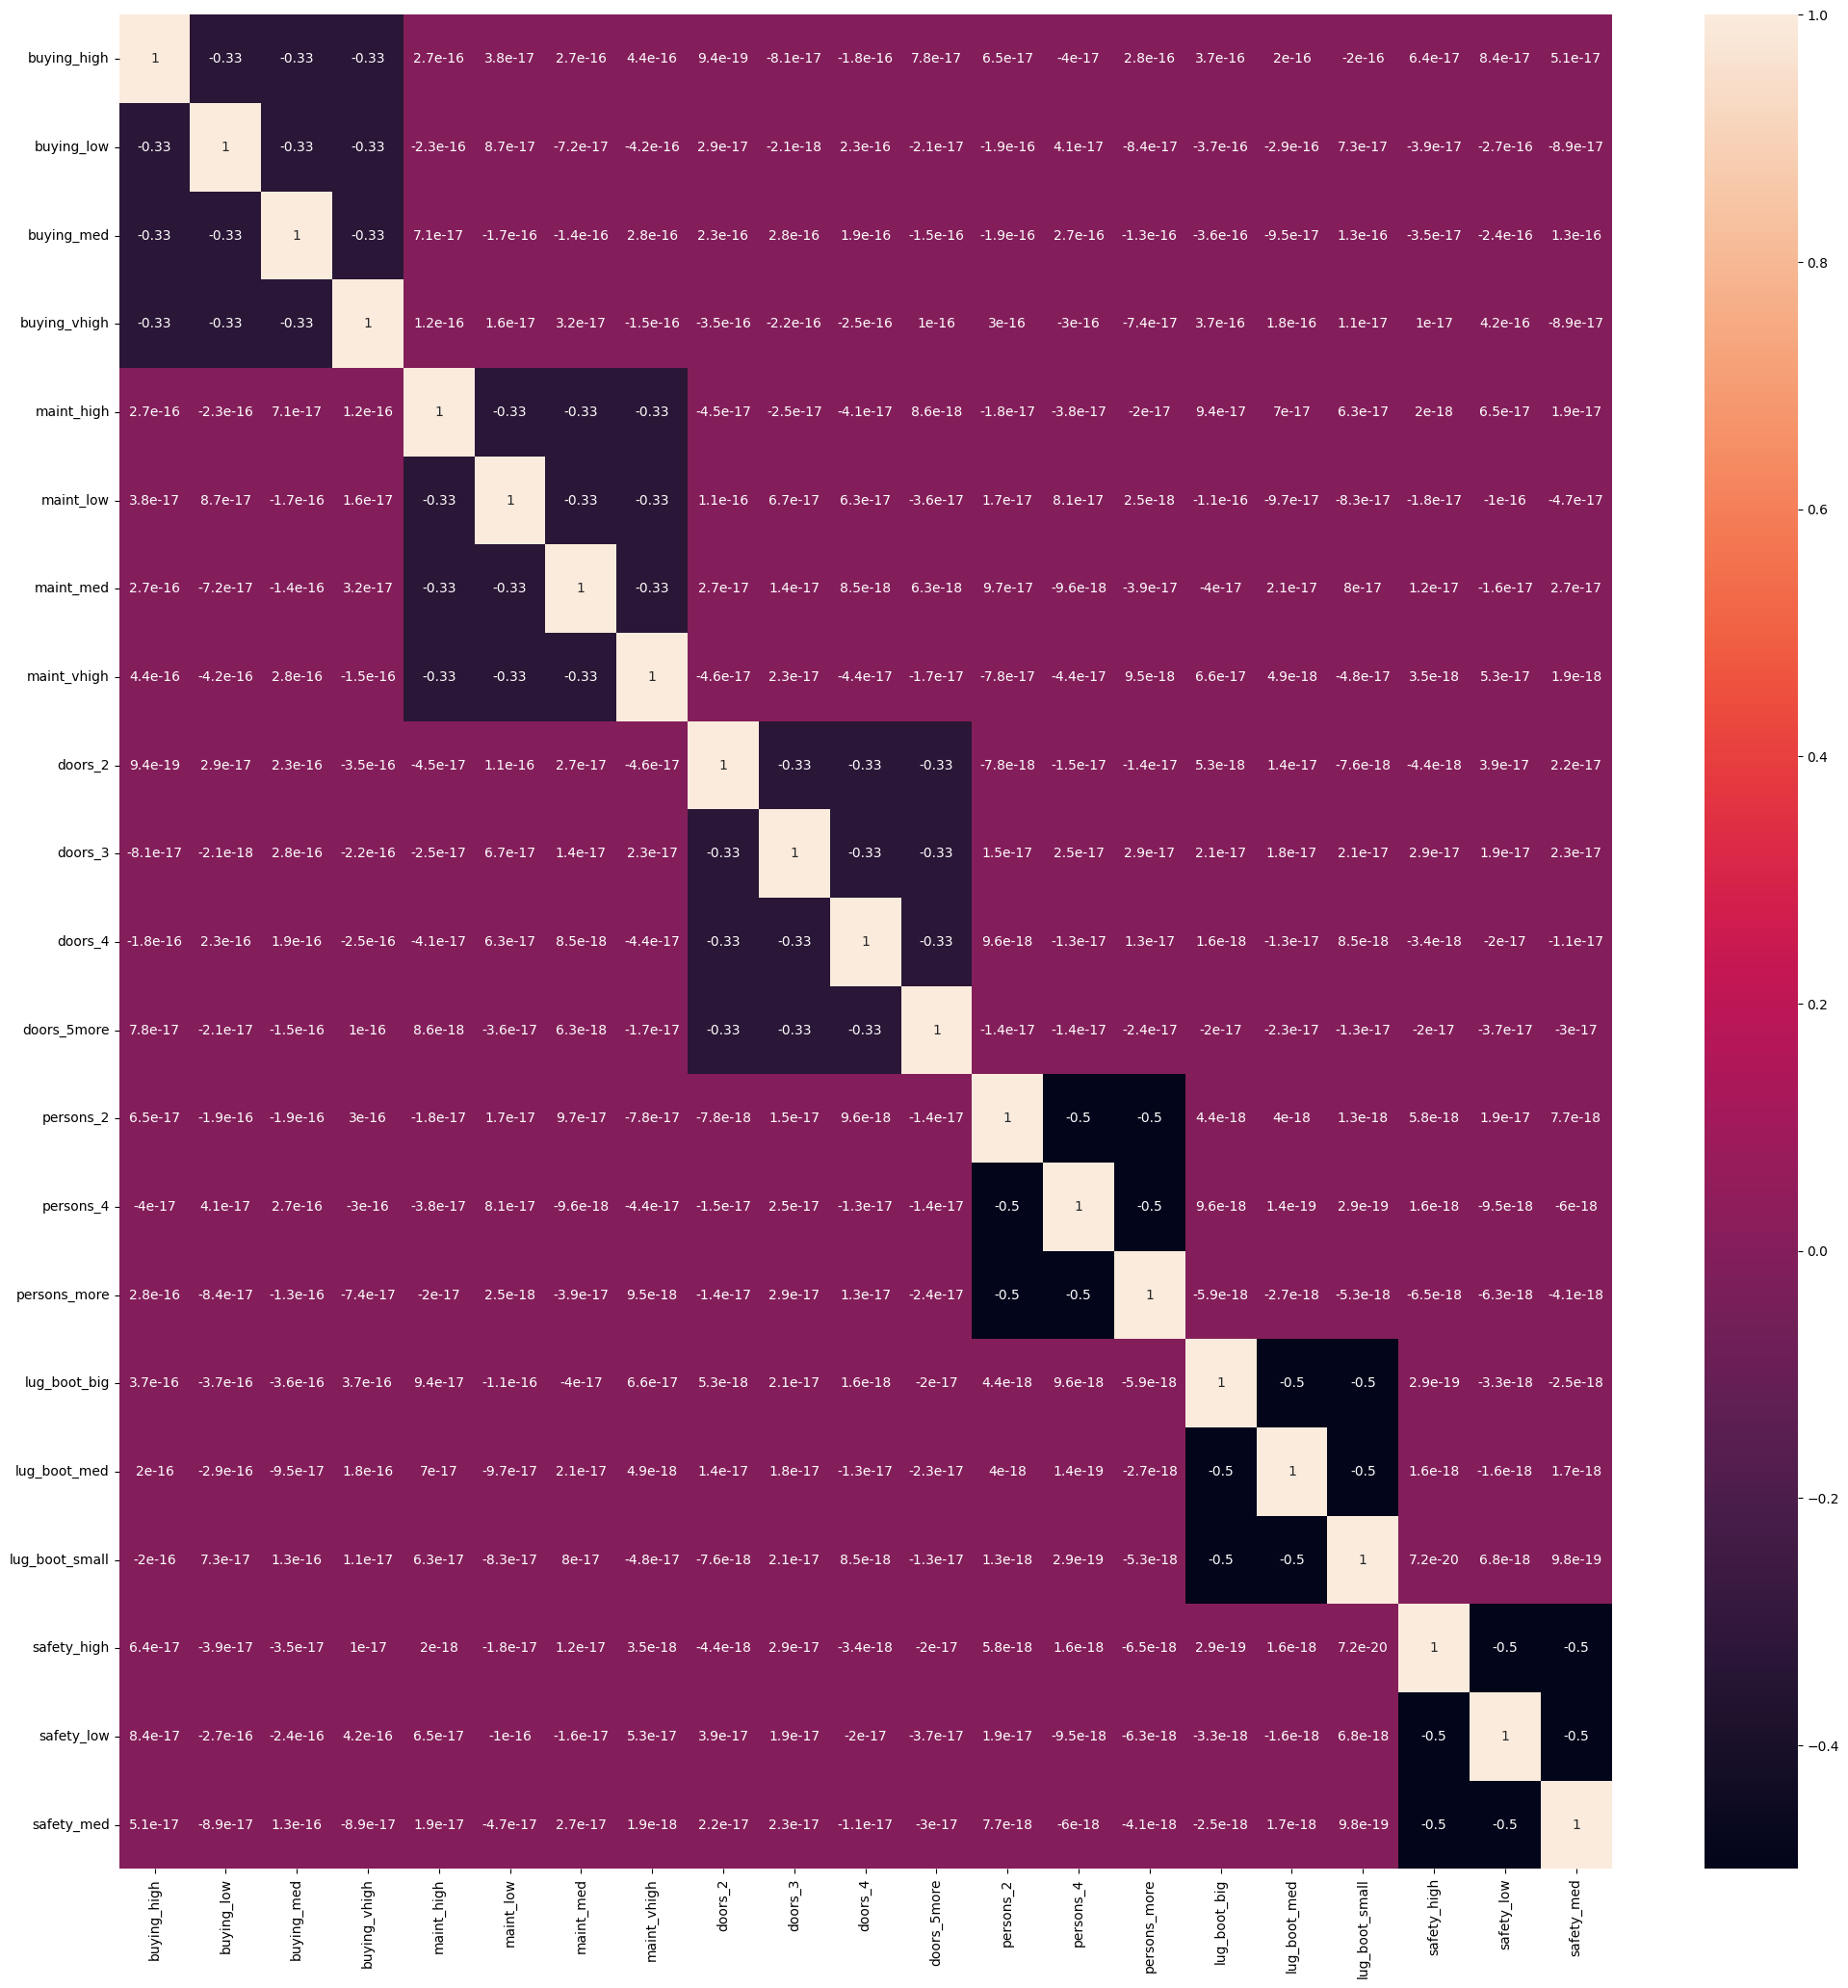

In [9]:
correlation_matrix = enc_df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

##### Heatmap to visualize the correlation between the columns

Boxplots to visualize the distribution of the data

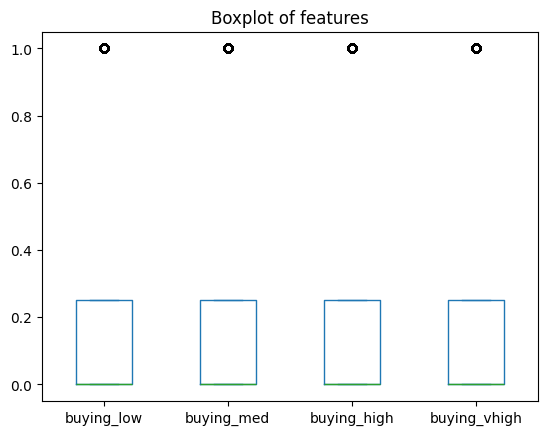

In [46]:
ax = enc_df[['buying_low','buying_med','buying_high','buying_vhigh']].plot(kind='box', title='Boxplot of features')
plt.show()

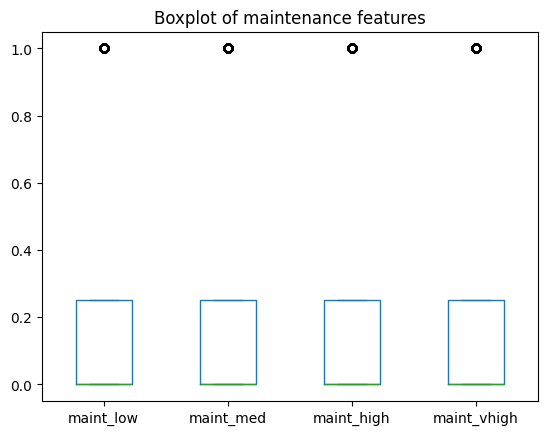

In [48]:
ax = enc_df[['maint_low','maint_med','maint_high','maint_vhigh']].plot(kind='box', title='Boxplot of maintenance features')

## PHASE 3: FEATURE ENGINEERING AND MODEL BUILDING

Feature Transformation

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(enc_df)
X_scaled_df = pd.DataFrame(X_scaled, columns=enc_df.columns)
X_scaled_df.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,-0.57735,-0.57735,-0.57735,1.732051,-0.57735,-0.57735,-0.57735,1.732051,1.732051,-0.57735,...,-0.57735,1.414214,-0.707107,-0.707107,-0.707107,-0.707107,1.414214,-0.707107,1.414214,-0.707107
1,-0.57735,-0.57735,-0.57735,1.732051,-0.57735,-0.57735,-0.57735,1.732051,1.732051,-0.57735,...,-0.57735,1.414214,-0.707107,-0.707107,-0.707107,-0.707107,1.414214,-0.707107,-0.707107,1.414214
2,-0.57735,-0.57735,-0.57735,1.732051,-0.57735,-0.57735,-0.57735,1.732051,1.732051,-0.57735,...,-0.57735,1.414214,-0.707107,-0.707107,-0.707107,-0.707107,1.414214,1.414214,-0.707107,-0.707107
3,-0.57735,-0.57735,-0.57735,1.732051,-0.57735,-0.57735,-0.57735,1.732051,1.732051,-0.57735,...,-0.57735,1.414214,-0.707107,-0.707107,-0.707107,1.414214,-0.707107,-0.707107,1.414214,-0.707107
4,-0.57735,-0.57735,-0.57735,1.732051,-0.57735,-0.57735,-0.57735,1.732051,1.732051,-0.57735,...,-0.57735,1.414214,-0.707107,-0.707107,-0.707107,1.414214,-0.707107,-0.707107,-0.707107,1.414214


Set the target variables to 0 and 4

In [12]:
car_df['class'] = car_df['class'].map({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3})

LR: 0.843712 (0.086484)
SVM: 0.883694 (0.059816)
DT: 0.840325 (0.078870)
RF: 0.830515 (0.088167)


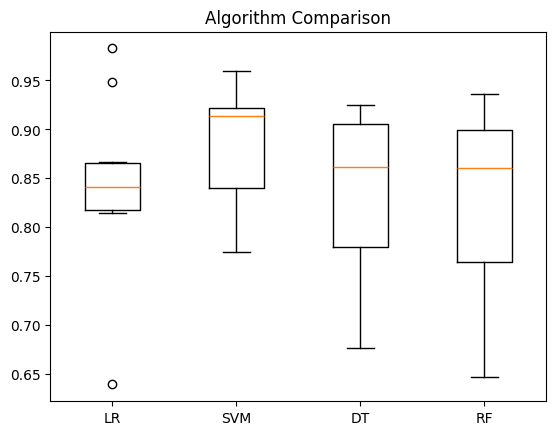

In [13]:
X = X_scaled_df.values
y = car_df['class'].values
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

results = []
names = []
for name, model in models:
    kfold = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    results.append(kfold)
    names.append(name)
    print("%s: %f (%f)" % (name, kfold.mean(), kfold.std()))

plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = []
model.append(('LR', LogisticRegression()))
model.append(('SVM', SVC()))
model.append(('DT', DecisionTreeClassifier()))
model.append(('RF', RandomForestClassifier()))

confusion_matrices = []
accuracy_scores = []
class_reports = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion_matrices.append((name + " : ",confusion_matrix(y_test, y_pred)))
    accuracy_scores.append((name + " : ",accuracy_score(y_test, y_pred)))
    class_reports.append((name + " : ",classification_report(y_test, y_pred)))

Confusion Matrices

In [27]:
confusion_matrices

[('LR : ',
  array([[228,   7,   0,   0],
         [  9,  67,   7,   0],
         [  0,   0,  10,   1],
         [  0,   1,   0,  16]])),
 ('SVM : ',
  array([[235,   0,   0,   0],
         [  0,  74,   7,   2],
         [  0,   0,  10,   1],
         [  0,   1,   0,  16]])),
 ('DT : ',
  array([[235,   0,   0,   0],
         [  4,  74,   3,   2],
         [  0,   0,  10,   1],
         [  0,   1,   2,  14]])),
 ('RF : ',
  array([[235,   0,   0,   0],
         [  0,  76,   6,   1],
         [  0,   1,   9,   1],
         [  0,   2,   1,  14]]))]

Accuracy Score

In [28]:
accuracy_scores

[('LR : ', 0.9277456647398844),
 ('SVM : ', 0.9682080924855492),
 ('DT : ', 0.9624277456647399),
 ('RF : ', 0.9653179190751445)]

Classification Report

In [29]:
for i in class_reports:
    print(i[0])
    print(i[1])

LR : 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       235
           1       0.89      0.81      0.85        83
           2       0.59      0.91      0.71        11
           3       0.94      0.94      0.94        17

    accuracy                           0.93       346
   macro avg       0.85      0.91      0.87       346
weighted avg       0.93      0.93      0.93       346

SVM : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       0.99      0.89      0.94        83
           2       0.59      0.91      0.71        11
           3       0.84      0.94      0.89        17

    accuracy                           0.97       346
   macro avg       0.85      0.94      0.88       346
weighted avg       0.98      0.97      0.97       346

DT : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       235
  

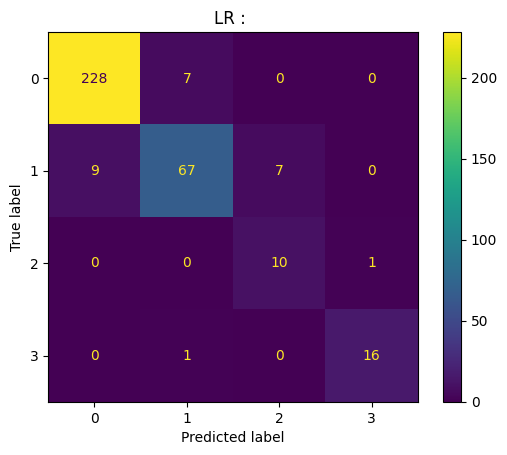

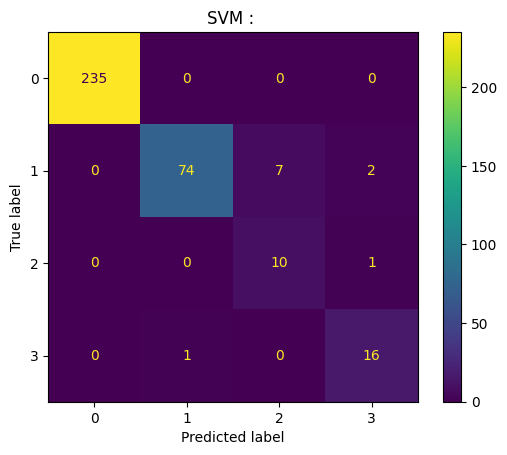

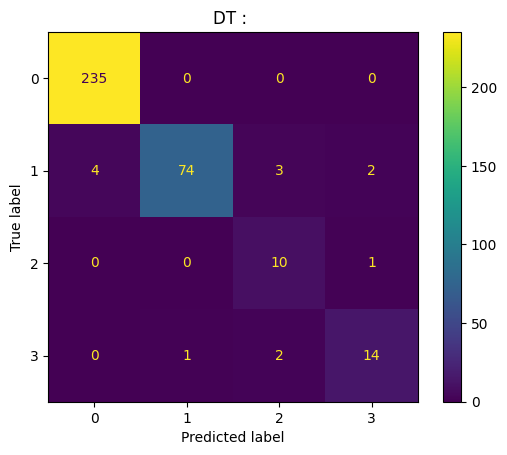

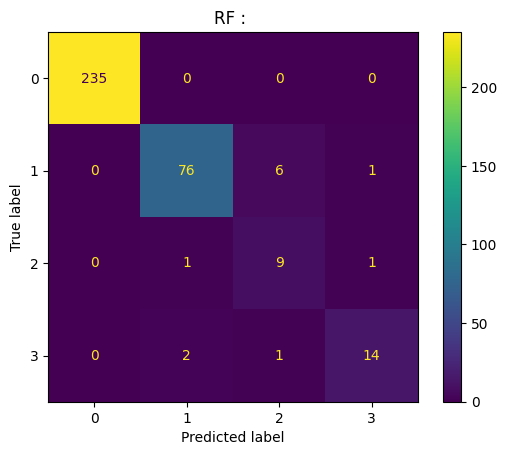

In [33]:
for i in confusion_matrices:
    ConfusionMatrixDisplay(i[1]).plot()
    plt.title(i[0])
    plt.show()